<a href="https://colab.research.google.com/github/sedwna/Salary-Dataset-Simple-linear-regression-with-pytorch/blob/main/src/Simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
# @title import library

import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [86]:
# @title import data
salary = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Salary%20Data.csv')
salary

,Experience Years,Salary
0,1.1,39343
1,1.2,42774
2,1.3,46205
3,1.5,37731
4,2.0,43525
5,2.2,39891
6,2.5,48266
7,2.9,56642
8,3.0,60150
9,3.2,54445


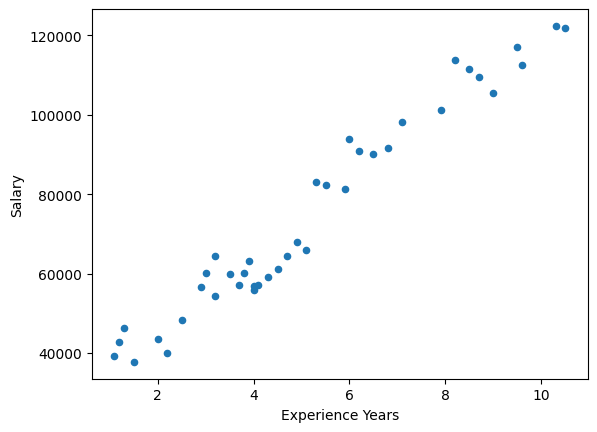

In [87]:
# @title Experience Years vs Salary

salary.plot(kind='scatter', x='Experience Years', y='Salary')
plt.show()

In [88]:
# @title split train and test data
X = salary['Experience Years'].values # .values for dont show number in left
y = salary['Salary'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28,), (12,), (28,), (12,))

In [89]:
# @title reshape 1D to 2D array
X_train = X_train.reshape(-1, 1)
y_train = y_train.reshape(-1, 1)

X_test = X_test.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((28, 1), (12, 1), (28, 1), (12, 1))

In [90]:
# @title preprocessing train data with standard scaler

x_scaler = StandardScaler()
X_train = x_scaler.fit_transform(X_train)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train)


In [91]:
# @title preprocessing test data with standard scaler

X_test = x_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [92]:
y_scaler.inverse_transform(y_test)

array([[ 60200.],
       [ 48266.],
       [109431.],
       [ 37731.],
       [111620.],
       [ 57081.],
       [ 43525.],
       [ 56957.],
       [121872.],
       [116969.],
       [113812.],
       [ 81363.]])

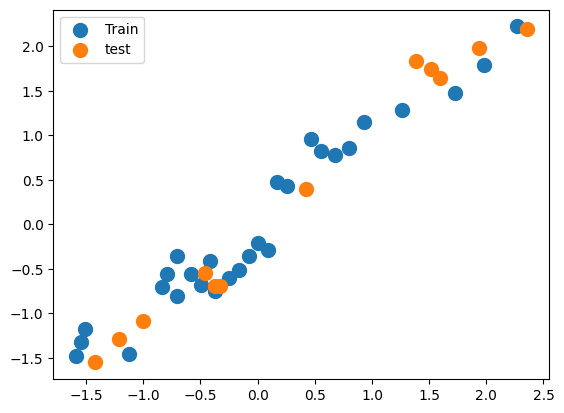

In [93]:
# @title plot X_train, y_train, X_test, y_test

plt.scatter(X_train,y_train, s = 100)
plt.scatter(X_test,y_test, s=100)

plt.legend(['Train','test'])
plt.show()

In [94]:
X_train = torch.tensor(X_train,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)

X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


(torch.Size([28, 1]),
 torch.Size([12, 1]),
 torch.Size([28, 1]),
 torch.Size([12, 1]))